# Project 3: Representation Learning

## Objectives
Your goal in this project is to get comfortable in implementing k-means, PCA, and neural network. To complete this project, you should understand the following:

* How to use basic math and machine learning modules in python such as numpy
* How to fit a k-means algorithm *from scratch*
* How to perform PCA (principal component analysis) *from scratch* on MNIST dataset
* How to train a neural network *from scratch* on MNIST dataset
* How to evaluate the test results and visualize the outcome of these ML models

## Deliverable
* Project report/writeup: A `project3_report_lastname.pdf` file with corresponding plots and results for the project. Follow the `Project 3 - Report (Individual Submission)` link on Gradescope to upload this file. Also, please put your name on the report so that the grader can find your code easier on the Gradescope. 

    The project report should include a brief justification of your solution at a high-level, e.g., using any relevant explanations, equations, or pictures that help to explain your solution. You should **answer each question sequenctially**, and use clearly labelled, separate paragraphs for each question. You should also **describe what your code does**, e.g. using a couple of sentences per function to describe your code structure. The objective is to make the report self-contained for grading.

    * To be more specific, in addition to textual descriptions and explanations for each sections, you should include images/screenshots/code blocks of:
        1. Any code snippets you implemented
        2. Plots affected by your implementation, e.g., scatter plots with decision boundaries or loss curves.
        3. Output results of the questions, e.g., the best lambda from cross validation.
        4. Please do NOT include debugging messages.


* Source code: A `project3_src_lastname1[_lastname2].ipynb` (or `.zip`) file with a working copy of your solutions compiled in a Jupyter notebook. Follow the `Project 3 - Source Code (Group Submission)` link to upload this file.
    * You are asked to complete code snippets in the following two formats:
        1. Between comments of `Your code starts here` and `End of Your Code`.
        2. Inline comments with `Your code here`.


## Logistics

* You can work in groups of 1-2 students for each course project, and it's your responsibility to find a group (e.g. use Ed Discussion). 
* Every member of a group must complete and submit the project report/writeup individually. While the source code can be the same for all group members, the project report needs to be written independently by each person and, thus, should differ among team member and students more generally.
* One group member need to submit the source code. If you submit as a group, make sure to include your teammate in the group submission. Instructions for team submission can be found [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
* Grades will be provided based on the individual project report. The source code submission will not be graded, but the teaching staff may check the source files if they see the need for reproducing your results when going through your project report. 
* Failure to submit the source code will lead to a deduction of points from your total.


## Task 3A: K-Means (30 points)
K-Means is an unsupervised ML algorithm that segments data into groups based on their similarities. In this part, we will implement K-Means with different seeding algorithms from scratch (using only numpy).

### Data Loader
We will use 2-dimensional data in this section. Specifically, the dataset are
2D points $[(x_1, y_1), (x_2, y_2), \dots, (x_n, y_n)]$ that form 5 distinct clusters.

In [87]:
# install seaborn for better visualization
!pip install seaborn

Prepare and plot the training set.

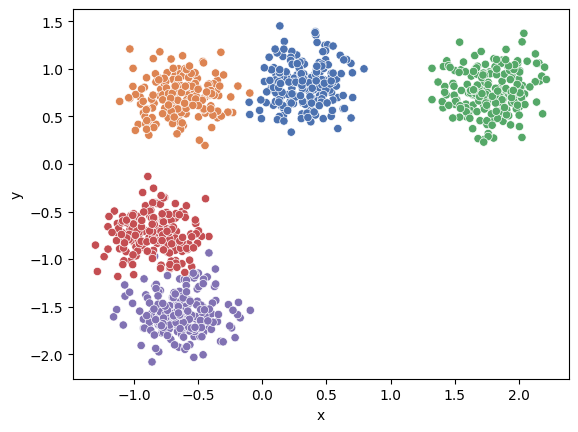

In [88]:
import seaborn as sns
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

num_samples = 1000
num_centers = 5


X_train, true_labels = make_blobs(
    n_samples=num_samples,
    centers=num_centers,
    random_state=80,
)
X_train = StandardScaler().fit_transform(X_train)
sns.scatterplot(
    x=[X[0] for X in X_train],
    y=[X[1] for X in X_train],
    hue=true_labels,
    palette="deep",
    legend=None,
)

plt.xlabel("x")
plt.ylabel("y")
plt.show()

### K-Means Implementation
Now we are implementing the algorithm.

First, we define "similarity" between points. For our dataset, we will be using Euclidean distances.

1. **Implement a helper function** that has two inputs: dataset, cur_point, and returns the Euclidean distance between cur_point and each point in the dataset.

In [89]:
import numpy as np

def euclidean_dist(cur_point, dataset):
    '''
    cur_point has dimensions (m,), dataset has dimensions (n, m), and output will be of size (n,).
    '''
    dists = None
    # Your Code Starts Here
    dists = np.linalg.norm(dataset - cur_point, axis=1)
    # End of Your Code
    return dists

Now, we implement the actual K-Means algorithm. We first initialize K-Means with two parameters: number of clusters, and max number of iteractions, which you will use in the init function. 

1. **Implent the initialization functions** to accommodate four different seeding strategies: first k, random, max distance, and k-means++.
2. **Implement the fit function** which takes the dataset you created earlier as input. 

Finally, we can assign data points to the closest centroid in the provided predict function.

In [90]:
from enum import Enum
import random
from numpy.random import uniform

class InitializationMethod(Enum):
    FirstK = 1
    Random = 2
    MaxDistance = 3
    KMeansPlusPlus = 4


class KMeans:
    def __init__(self, n_clusters : int = 5, max_iter : int = 1000):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None

    def initialize_and_fit(self,
                           initialization_method : InitializationMethod,
                           X_train : np.ndarray):
        # Initialize based on provided method choice.
        if initialization_method == InitializationMethod.FirstK:
            self.centroids = self.__initialize_first_k(X_train)
        elif initialization_method == InitializationMethod.Random:
            self.centroids = self.__initialize_random(X_train)
        elif initialization_method == InitializationMethod.MaxDistance:
            self.centroids = self.__initialize_max_distance(X_train)
        elif initialization_method == InitializationMethod.KMeansPlusPlus:
            self.centroids = self.__initialize_kmeanspp(X_train)

        # Some validation to be sure your methods are at least somewhat behaving.
        assert not self.centroids is None  # The centroids were set.
        assert len(self.centroids) == self.n_clusters  # n_clusters of them were chosen.

        # Fit to the given centroids.
        num_iterations_needed = self.__fit(X_train)
        return num_iterations_needed

    def __initialize_first_k(self, X_train : np.ndarray):
        """
        Initialize the centroids by selecting the first k points in X_train.
        """
        centroids = []

        # YOUR CODE STARTS HERE
        for i in range(self.n_clusters):
            centroids.append(X_train[i])
        # YOUR CODE ENDS HERE

        return centroids

    def __initialize_random(self, X_train : np.ndarray):
        """
        Initialize the centroids by selecting k different points uniformly at
        random from X_train.
        """
        centroids = []

        # YOUR CODE STARTS HERE
        uni = uniform(0, len(X_train), self.n_clusters)
        uni = uni.astype(int)

        for i in uni:
            centroids.append(X_train[i])
        # YOUR CODE ENDS HERE

        return centroids

    def __initialize_max_distance(self, X_train : np.ndarray):
        """
        Initialize the centroids by iteratively selecting the furthest point.
        First, a random datapoint is selected as the first centroid, and then
        at each step (until k have been selected) the point in X_train that is
        of maximum distance from any existing cluster center is selected.
        """
        # Pick a random point from train data for first centroid.
        centroids = [random.choice(X_train)]

        # Then choose the remaining points by selecting the point with maximum
        # euclidian distance to any current centroid.
        #
        # YOUR CODE STARTS HERE
        while len(centroids)< self.n_clusters:
            next = None
            maxdist = 0

            for x in X_train:
                dist = euclidean_dist(x, centroids)

                mindist = np.min(dist) 

                if mindist > maxdist:
                    maxdist = mindist
                    next = x

            centroids.append(next)


        # YOUR CODE ENDS HERE

        return centroids

    def __initialize_kmeanspp(self, X_train : np.ndarray):
        """
        Initialize the centroids using the "k-means++" method, where a random
        datapoint is selected as the first, then the rest are initialized w/
        probabilities proportional to their distances to the first.
        """
        
        # Pick a random point from train data for first centroid.
        centroids = [random.choice(X_train)]

        # Then choose the remaining points as per kMeans++ algorithm.
        #
        # YOUR CODE STARTS HERE
        while len(centroids) < self.n_clusters:
            distlst = []
            trainlen = len(X_train)
            for x in X_train:
                dist = euclidean_dist(x, centroids)
                distlst.append(np.min(dist))
            
            distlst = np.array(distlst)
            probs = distlst / np.sum(distlst)

            randidx = np.random.choice(trainlen, p=probs)
            next = X_train[randidx]

            centroids.append(next)

        # YOUR CODE ENDS HERE

        return centroids

    def __fit(self, X_train : np.ndarray):
        """
        Iterate, adjusting centroids until converged (new centroids are the same
        as previous centroids) or until passed max_iter.

        Returns the number of iterations needed for the choice of centroids to
        stabilize.
        """
        iteration_count = 0
        prev_centroids = None

        while np.not_equal(self.centroids, prev_centroids).any() and iteration_count < self.max_iter:
            # Sort each datapoint, assigning to nearest centroid
            # Push current centroids to previous, reassign centroids as mean of the points belonging to them
            #
            # YOUR CODE STARTS HERE

            prev_centroids = np.copy(self.centroids)
        
            clusters = [ [] for _ in range(self.n_clusters)]
            
            for point in X_train:
                dists = euclidean_dist(point, self.centroids)
                closest = np.argmin(dists)

                clusters[closest].append(point)
            
            for i in range(self.n_clusters):
                if clusters[i]: 
                    avg = np.mean(clusters[i], axis=0 )  

                    self.centroids[i] = avg 

            # YOUR CODE ENDS HERE
            iteration_count += 1

        return iteration_count

    def predict(self, X : np.ndarray):
        """
        Assign each data point to the nearest centroid.
        """
        centroids = []
        centroid_idxs = []
        for x in X:
            dists = euclidean_dist(x, self.centroids)
            centroid_idx = np.argmin(dists)
            centroids.append(self.centroids[centroid_idx])
            centroid_idxs.append(centroid_idx)

        return centroids, centroid_idxs

Now, **test and visualize your k-means algorithm** with various initializations. In the below given code, we separate the different true labels by color (as previously), and we distinguish predicted labels by marker styles.

*You should make sure all centroids ("+" signs) are in different clusters. Since initialization is important for k-means, so this may not be true for every run.*

The below code will generate 3 charts, each containing 4 sub-plots. **Include at least one of them in your report, and comment on your observations**.

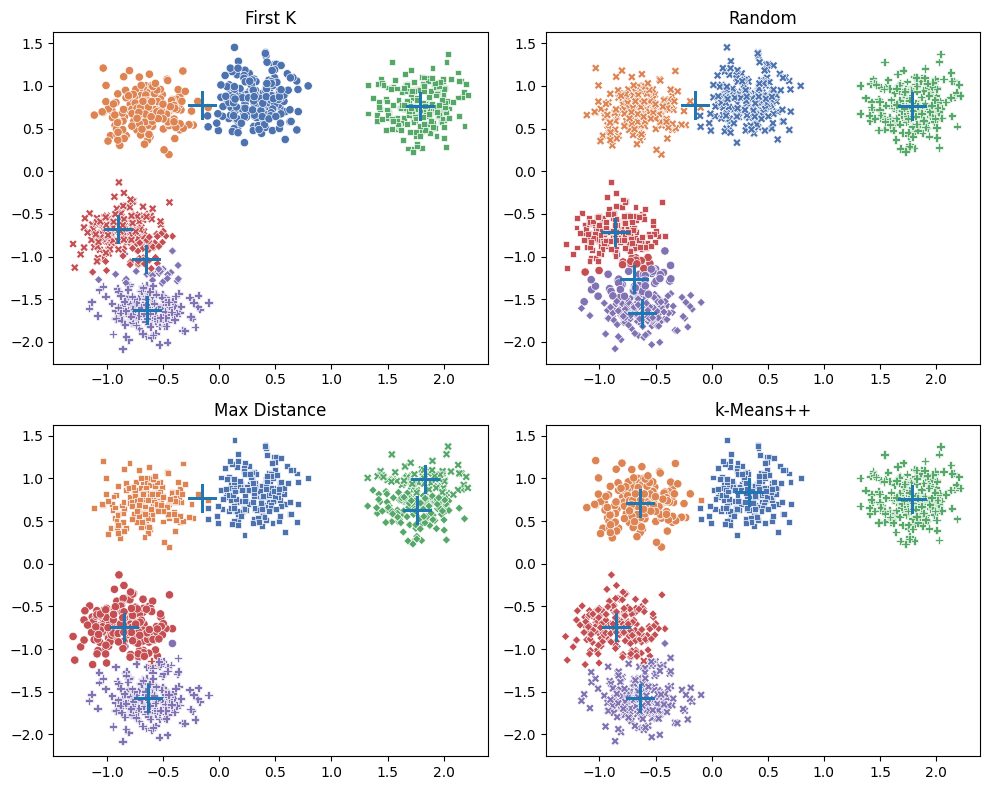

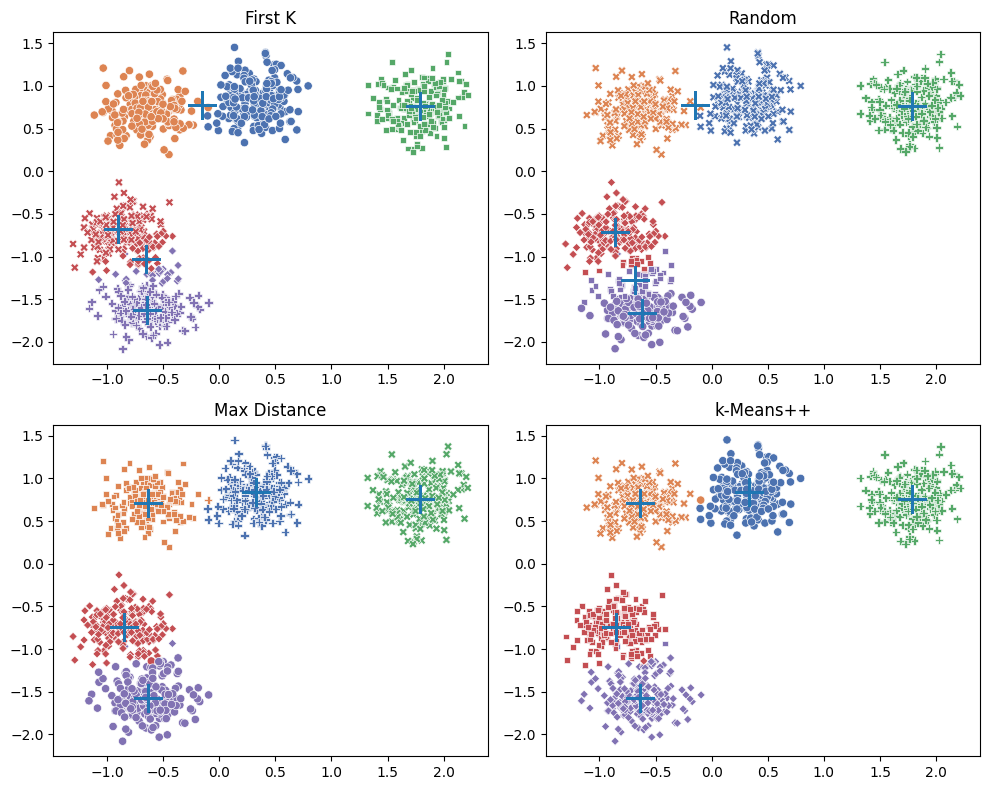

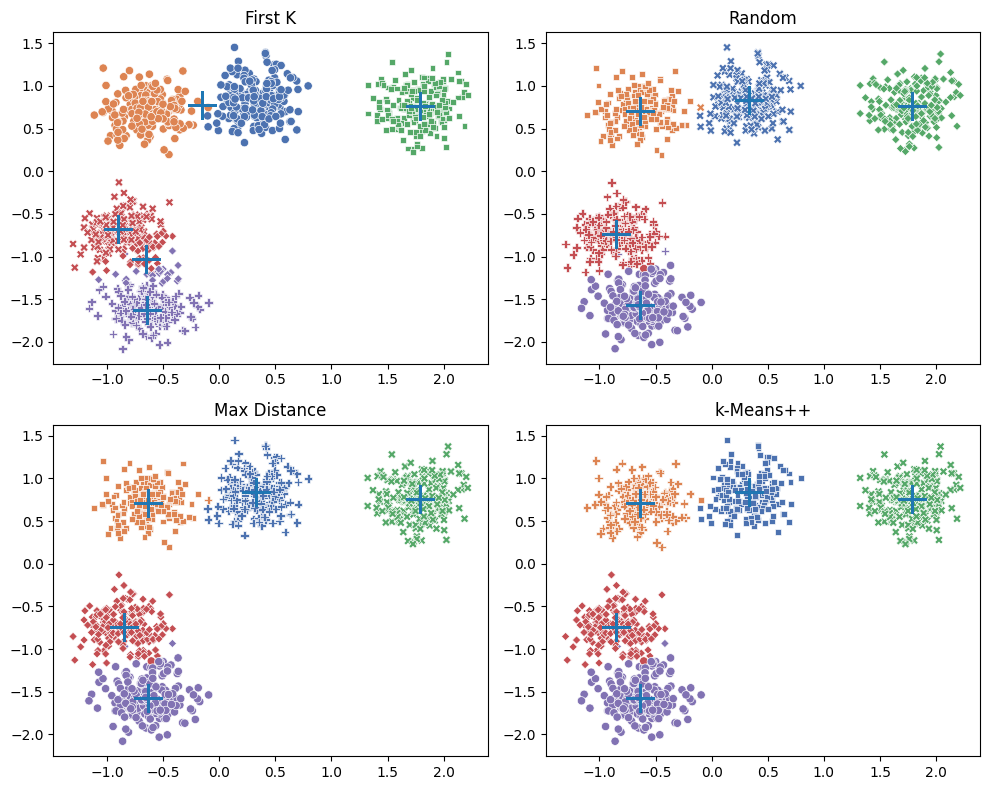

In [91]:
import matplotlib.pyplot as plt
import numpy as np

initializetion_methods = [
    (InitializationMethod.FirstK, "First K"),
    (InitializationMethod.Random, "Random"),
    (InitializationMethod.MaxDistance, "Max Distance"),
    (InitializationMethod.KMeansPlusPlus, "k-Means++")
]

def plot_predictions(model : KMeans, X : np.ndarray, y : np.ndarray):
    """Generates a single chart with subplots for multiple model prediction runs."""

    fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # 2x2 grid of subplots
    axes = axes.flatten()  # Flatten the axes array for easier indexing

    for i in range(len(initializetion_methods)):
        method, name = initializetion_methods[i]

        # Initialize with given method.
        model.initialize_and_fit(method, X_train)

        # View results
        class_centers, classification = model.predict(X_train)

        # plot the ground truths
        sns.scatterplot(
            x=X,
            y=y,
            hue=true_labels,
            style=classification,
            palette="deep",
            legend=None,
            ax=axes[i]
        )
        # plot the centroids
        axes[i].plot(
            [x for x, _ in class_centers],
            [y for _, y in class_centers],
            '+',
            markersize=20,
        )

        axes[i].set_title(name)

    plt.tight_layout()  # Adjust subplot params for a tight layout
    plt.show()

# Run k-means with each initialization method.
model = KMeans(n_clusters=num_centers)
for _ in range(3):
    plot_predictions(model, [X[0] for X in X_train], [X[1] for X in X_train])

The accuracy of these different methods can be seen above, but that's only the _end result_! As you can see in your code, each of these initialization methods is of varying complexity. 

From each initialization state, how many steps does it take to complete initialization? **Include this graph in your report, and comment on the results.**

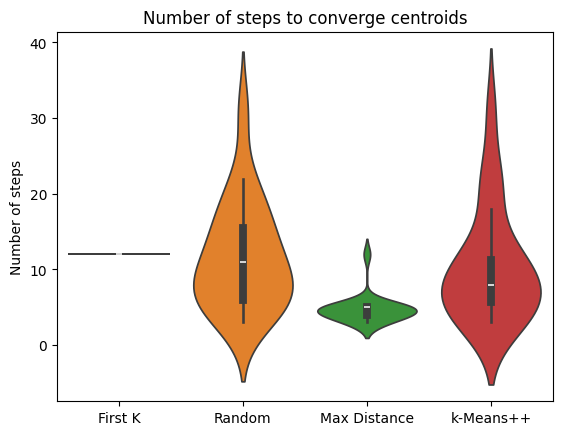

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

iterations = 20

# Run k-means with each initialization method.
model = KMeans(n_clusters=num_centers)

data = []
for i in range(len(initializetion_methods)):
    method, name = initializetion_methods[i]

    num_steps = []
    for i in range(iterations):

        # Initialize with given method.
        num_steps.append(model.initialize_and_fit(method, X_train))

    data.append((num_steps, name))

sns.violinplot([d[0] for d in data])
plt.xticks(np.arange(len(data)), labels=[d[1] for d in data])
plt.title("Number of steps to converge centroids")
plt.ylabel("Number of steps")
plt.show()

#### Questions

In practice, both k-Means++ and Max Distance are used. In what conditions might you prefer one of these methods over another? What are the drawbacks of each method?

## Task 3B: Principal Component Analysis (30 points)

In this problem you will apply PCA for dimensionality reduction to the MNIST dataset.

Note that **you must implement PCA directly with Numpy**, you are not allowed to use the PCA class from scikit-learn or any other PCA/dimensionality reduction library.

### Load the dataset and visualize some examples

In [93]:
# Download dataset
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

print('Loading and preprocessing data')
# Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False, data_home='data')
y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.7)

Loading and preprocessing data


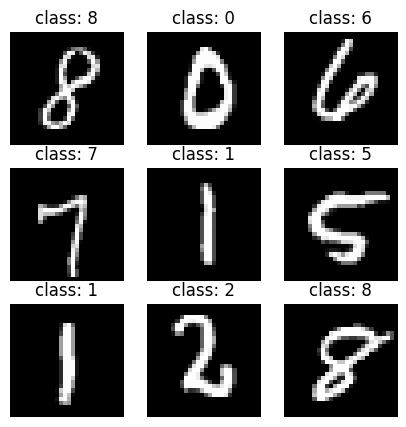

In [94]:
# plot some random samples from training set
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 3, figsize=(5, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'class: {y_train[i]}')
    ax.axis('off')

### A simple linear classifier

This class has been implemented for you. You don't need to change code here.

In [95]:
# Don't Change this cell
class LinearClassifier:
    """
    Simple linear classifier trained using full-batch gradient descent.
    - Maps n_features -> n_classes logits using a weight matrix W and bias vector b.
    - Applies softmax to the logits to get class probabilities that sum to 1.
    - In prediction, we take the class with the highest probability as our output class.
    """
    def __init__(self, n_features, classes=np.arange(10), eps=1e-4):
        self.classes = classes
        self.W = np.random.rand(n_features, len(classes)) / 30
        self.b = np.random.rand(len(classes)) / 30
        self.eps = eps
    
    def fit(self, X, y):
        assert len(X) == len(y)
        assert set(y) == set(self.classes)

        for i in range(200):
            # forward pass
            z = X @ self.W + self.b

            # softmax to convert logits to class probabilities
            exp_z = np.exp(z)
            softmax = exp_z / exp_z.sum(axis=1, keepdims=True)

            # cross-entropy loss
            n = len(X)
            loss = -np.log(softmax[range(n), y]).sum() / n

            # backward pass
            dL_dz = softmax
            dL_dz[range(n), y] -= 1
            dL_dz /= n

            dL_dW = X.T @ dL_dz
            dL_db = dL_dz.sum(axis=0)

            # update weights
            self.W -= self.eps * dL_dW
            self.b -= self.eps * dL_db

            # print classification accuracy
            if i % 50 == 0:
                predictions = np.argmax(z, axis=1)
                accuracy = (predictions == y).mean()
                print(f'iteration {i}: loss {loss:.4f}, accuracy {accuracy:.4f}')
        predictions = np.argmax(z, axis=1)
        accuracy = (predictions == y).mean()
        print(f'Final iteration {i}: loss {loss:.4f}, accuracy {accuracy:.4f}')
    
    def predict(self, X):
        z = X @ self.W + self.b
        return np.argmax(z, axis=1)


### Baseline

**As a baseline, let's report the accuracy of a simple linear classifier trained with full-batch gradient descent**. Instead of using all 28 x 28 = 784 pixels as input, we'll uniformly sample 27 pixels from the image and see what our accuracy is.

You should see something around ~57% train accuracy and ~57% test accuracy.

In [96]:
# subsample every 30 pixels
X_train_subset = X_train[:, ::30]
print(f'Using {X_train_subset.shape[1]} features')

classifier = LinearClassifier(n_features=X_train_subset.shape[1])

# center the data and store the means
feat_means = X_train_subset.mean(axis=0, keepdims=True)
X_train_subset = X_train_subset - feat_means
classifier.fit(X_train_subset, y_train)

Using 27 features
iteration 0: loss 5.6280, accuracy 0.1149
iteration 50: loss 1.4100, accuracy 0.5533
iteration 100: loss 1.3566, accuracy 0.5720
iteration 150: loss 1.3416, accuracy 0.5756
Final iteration 199: loss 1.3334, accuracy 0.5774


In [97]:
# evaluate our test accuracy
X_test_subset = X_test[:, ::30]
preds = classifier.predict(X_test_subset - feat_means)
test_acc = (preds == y_test).mean()
print(f'Test accuracy: {test_acc:.4f}')

Test accuracy: 0.5767


### PCA for dimensionality reduction in classification

Can we use PCA to choose a more effective set of features? 

Following the starter code below to implement PCA:

- First, **implement the fit function** which takes the data as input, and compute and store the truncated SVD into self.U_subset, self.S_subset, self.Vt_subset.

- Then, **implement the predict function**, which projects the data onto our kept principal components.


In [98]:
class PCA:
    def __init__(self, n_components):
        # number of principal components to keep when we apply PCA
        assert n_components <= 784
        self.n_components = n_components

        self.feature_means = None
        self.U, self.S, self.Vt = None, None, None
        self.U_subset, self.S_subset, self.Vt_subset = None, None, None
    
    def fit(self, X):
        """
        Steps:
        - Center the data (compute, store, and subtract the mean of each feature)
        - Take the SVD of the centered data
        - Truncate the SVD by keeping only the first n_components (singular values)
        """
        n_samples, n_features = X.shape

        ## Your Code Starts Here ##
        # center the data per feature
        self.feature_means = np.mean(X)
        X_centered = X - self.feature_means
        # take SVD
        self.U, self.S, self.Vt = np.linalg.svd(X_centered)
        # store truncated SVD
        self.U_subset, self.S_subset, self.Vt_subset = self.U[:, :self.n_components], self.S[:self.n_components], self.Vt[:self.n_components, :]
        ## End of Your Code ##

    def predict(self, X):
        """
        Steps:
        - Center the data (subtract the mean of each feature, stored in the fit)
        - Project the centered data onto the principal components

        Returns:
        - Projected data of shape (X.shape[0], n_components)
        """
        if self.feature_means is None:
            raise ValueError('fit the PCA model first')

        ## Your Code Starts Here ##
        # center X
        X_centered = X - self.feature_means

        # project the centered data set onto our kept principal components
        return X_centered @ self.Vt_subset.T
        ## End of Your Code ##

In [99]:
# fit PCA
pca = PCA(27)
pca.fit(X_train)

Explained variance ratio with 27 components: 0.3363


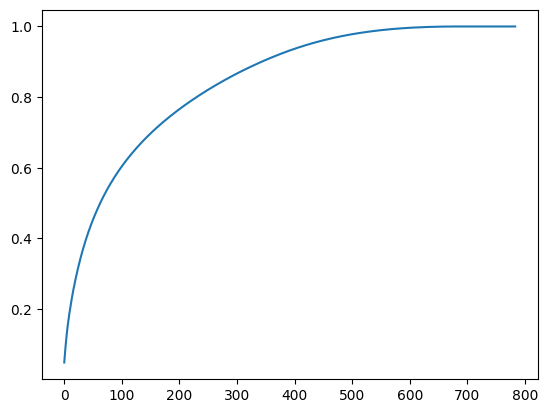

In [100]:
# plot the explained variance ratio
S = pca.S
plt.plot(S.cumsum() / S.sum())

# report the truncated feature ratio
explained_var_ratio = (S.cumsum() / S.sum())[pca.n_components]
print(f'Explained variance ratio with {pca.n_components} components: {explained_var_ratio:.4f}')

In [101]:
X_train_subset = pca.predict(X_train)
X_test_subset = pca.predict(X_test)

classifier = LinearClassifier(n_features=27)
classifier.fit(X_train_subset, y_train)

iteration 0: loss 32.4944, accuracy 0.0738
iteration 50: loss 0.9535, accuracy 0.8471
iteration 100: loss 0.8045, accuracy 0.8526
iteration 150: loss 1.5391, accuracy 0.7697
Final iteration 199: loss 0.7557, accuracy 0.8535


**Evaluate our test accuracy with PCA.** You are expected to achieve a higher accuracy ~80%.

In [102]:
preds = classifier.predict(X_test_subset)
test_acc = (preds == y_test).mean()
print(f'Test accuracy: {test_acc:.4f}')

Test accuracy: 0.8423


### PCA for visualization
The following block of code will visualize the first 2 principal components. You should discuss what you see by comparing the clusters of different digits in the 2D space.

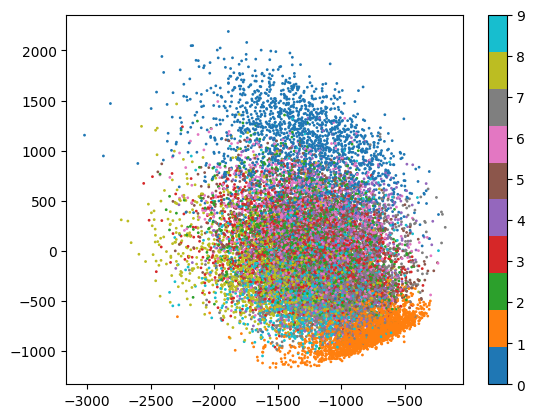

In [103]:
# extract the first two PCs from the training set and plot it
X_train_subset = pca.predict(X_train)
X_train_subset = X_train_subset[:, :2]

plt.scatter(X_train_subset[:, 0], X_train_subset[:, 1], c=y_train, cmap='tab10', alpha=1.0, s=1)
plt.colorbar()

## Task 3C: Neural Network (40 points + 20 bonus points)

Your goal in this exercise is to classify
handwritten digits with neural networks. The training and test units, together with the
structure of a multilayer perceptron class are already provided in the starter code. Your task
is to code up the key lines that complete the **forward** and **backward** propagation functions.


**forward**: Recall that forward propagation corresponds to the prediction algorithm for neural nets. The
intermediate outputs for this method will be cached for backpropagation during the training phase.

**backward**: Backpropagation collects all the gradients necessary for training the neural network, which will be
used as input for the minibatch SGD algorithm GradientDescentOptimizer

In the next, you will need to implement the forward pass and backward pass of the linear layer. For the forward pass, it takes $x_l$ as input and outputs $x_{l+1}$.

$$x_{l+1} = w^\top x_{l} + b_{l}$$

For the backward pass, you will need to compute the backward gradients,

$$ \frac{\partial \ell(x, y)}{\partial w}=?$$ 
$$\frac{\partial \ell(x, y)}{\partial b}=?$$
$$\frac{\partial \ell(x, y)}{\partial x_{l}}=?$$

where $\ell$ is the loss function. 

### Task 3C.1: Forward and Backward Propogation (20pt)

**Implement the forward and backward pass of the linear layer.**

In [104]:
import numpy as np

class Layer(object):
    def __init__(self, shape, activ_func):
        "Implements a layer of a NN."
      
        self.w = np.random.uniform(-np.sqrt(2.0 / shape[0]),
                                   np.sqrt(2.0 / shape[0]),
                                   size=shape)
        self.b = np.zeros((1, shape[1]))

        # The activation function, for example, RELU, tanh, or sigmoid.
        self.activate = activ_func

        # The derivative of the activation function.
        self.d_activate = GRAD_DICT[activ_func]

    def forward(self, inputs):
        """Forward propagate the activation through the layer.
        
        Given the inputs (activation of previous layers),
        compute and save the activation of current layer,
        then return it as output.
        """

        ###################################Description begins#################
        # Forward pass

        # Use the linear and non-linear transformation to
        # compute the activation and cache it in a the field, self.a.

        # Functions you may use:
        # np.dot: numpy function to compute dot product of two matrix.
        # self.activate: the activation function of this layer,
        #                it takes in a matrix of scores (linear transformation)
        #                and compute the activations (non-linear transformation).
        # (plus the common arithmetic functions).

        # For all the numpy functions, use google and numpy manual for
        # more details and examples.        
        
        # Object fields you will use:
        # self.w:
        #     weight matrix, a matrix with shape (H_-1, H).
        #     H_-1 is the number of hidden units in previous layer
        #     H is the number of hidden units in this layer
        # self.b: bias, a matrix/vector with shape (1, H).
        # self.activate: the activation function of this layer.

        # Input:
        # inputs:
        #    a matrix with shape (N, H_-1),
        #    N is the number of data points.
        #    H_-1 is the number of hidden units in previous layer

        ###################################Description ends####################
        # Modify the right hand side of the following code.
        
        # The linear transformation.
        # scores:
        #     weighted sum of inputs plus bias, a matrix of shape (N, H).
        #     N is the number of data points.
        #     H is the number of hidden units in this layer.

        scores = np.dot(inputs,self.w)+self.b ## Your code here ##
        # End of your code
        

        # The non-linear transformation.
        # outputs:
        #     activations of this layer, a matrix of shape (N, H).
        #     N is the number of data points.
        #     H is the number of hidden units in this layer.

        activations = self.activate(scores) ## Your code here ##
        # End of your code

        # End of the code to modify
        #########################################################

        # Cache the inputs and the activations (to be used by backprop).
        
        self.inputs = inputs
        self.a = activations
        outputs = activations
        return outputs

    def backward(self, d_outputs):
        """Backward propagate the gradient through this layer.
        
        Given the gradient w.r.t the output of this layer
        (d_outputs), compute and save the gradient w.r.t the
        weights (d_w) and bias (d_b) of this layer and
        return the gradient w.r.t the inputs (d_inputs).
        """
        ###################################Description begins#################
        # Backpropagation

        # Compute the derivatives of the loss w.r.t the weights and bias
        # given the derivatives of the loss w.r.t the outputs of this layer
        # using chain rule.

        # Naming convention: use d_var to store the
        # derivative of the loss w.r.t the variable.
        
        # Functions you may use:
        # np.dot (numpy.dot): numpy function to compute dot product of two matrix.
        # np.mean or np.sum (numpy.mean or numpy.sum):
        #     numpy function to compute the mean or sum of a matrix,
        #     use keywords argument 'axis' to compute the mean
        #     or sum along a particular axis, you might also
        #     found 'keepdims' argument useful.
        # self.d_activate:
        #     given the current activation (self.a) as input,
        #     compute the derivative of the activation function,
        #     See d_relu as an example.
        # (plus the common arithmetic functions).
        # np.transpose or m.T (m is an numpy array): transpose a matrix.
        
        
        # Object fields you will use:
        # self.w: weight matrix, a matrix with shape (H_-1, H).
        #         H_-1 is the number of hidden units in previous layer
        #         H is the number of hidden units in this layer
        # self.d_activate: compute derivative of the activation function.
        #                  See d_relu as an example.
        # d_outputs: the derivative of the loss w.r.t the outputs of
        #            this layer, a matrix of shape (N, H). N is the number of
        #            data points and H is the number of hidden units in this layer.
        # self.inputs: inputs to this layer, a matrix with shape (N, H_-1)
        #              N is the number of data points.
        #              H_-1 is the number of hidden units in previous layer.
        # self.a: activation of the hidden units of this layer, a matrix
        #         with shape (N, H)
        #         N is the number of data points.
        #         H is the number of hidden units in this layer.

        ###################################Description ends####################
        
        
        # Modify the right hand side of the following code.

        # d_scores:
        #     Derivatives of the loss w.r.t the scores (the result from linear transformation).
        #     A matrix of shape (N, H)
        #     N is the number of data points.
        #     H is the number of hidden units in this layer.
        d_scores = self.d_activate(self.a)*d_outputs ## Your code here ##
        # End of your code

        # self.d_b:
        #     Derivatives of the loss w.r.t the bias, averaged over all data points.
        #     A matrix of shape (1, H)
        #     H is the number of hidden units in this layer.

        self.d_b = np.sum(d_scores) ## Your code here ##
        # End of your code

        # self.d_w:
        #     Derivatives of the loss w.r.t the weight matrix, averaged over all data points.
        #     A matrix of shape (H_-1, H)
        #     H_-1 is the number of hidden units in previous layer
        #     H is the number of hidden units in this layer.      
          
        self.d_w = np.dot(self.inputs.T,d_scores) ## Your code here ##
        # End of your code

        # d_inputs:
        #     Derivatives of the loss w.r.t the previous layer's activations/outputs.
        #     A matrix of shape (N, H_-1)
        #     N is the number of data points.
        #     H_-1 is the number of hidden units in the previous layer.
        
        d_inputs = np.dot(d_scores,self.w.T) ## Your code here ##
        # End of your code

        # End of the code to modify
        #########################################################
        
		# Compute the average value of the gradients, since
        # we are minimizing the average loss. 
        self.d_b /= d_scores.shape[0]
        self.d_w /= d_scores.shape[0]
        
        return d_inputs

You have successfully completed task 3C-I. Please run the code to define the Multi-Layer Perceptron (MLP).

In [105]:
import numpy as np
    
#########################
#  Multilayer Perceptron
#########################

class MLP(object):
    def __init__(self, input_dim, output_dim, sizes, activ_funcs):
        """Multilayer perceptron for multi-class classification.

        The object holds a list of layer objects, each one
        implements a layer in the network, the specification
        of each layer is decided by input_dim, output_dim,
        sizes and activ_funcs. Note that an output layer
        (linear) and loss function (softmax and
        cross-entropy) would be automatically added to the MLP.

        Input: 
          input_dim: dimension of input.
          output_dim: dimension of output (number of labels).
          sizes: a list of integers specifying the number of
            hidden units on each layer.
          activ_funcs: a list of function objects specifying
            the activation function of each layer.

        """
        # Last layer is linear and loss is mean_cross_entropy_softmax
        self.sizes = [input_dim] + sizes[:] + [output_dim]
        self.activ_funcs = activ_funcs[:] + [linear]
        self.shapes = []
        for i in range(len(self.sizes)-1):
            self.shapes.append((self.sizes[i], self.sizes[i+1]))

        self.layers = []
        for i, shape in enumerate(self.shapes):
            self.layers.append(Layer(shape, self.activ_funcs[i]))

    def forwardprop(self, data, labels=None):
        """Forward propagate the activations through the network.

        Iteratively propagate the activations (starting from
        input data) through each layer, and output a
        probability distribution among labels (probs), and
        if labels are given, also compute the loss. 
        """
        inputs = data
        for layer in self.layers:
            outputs = layer.forward(inputs)
            inputs = outputs
            
        probs = softmax(outputs)
        if labels is not None:
            return probs, self.loss(outputs, labels)
        else:
            return probs, None

    def backprop(self, labels):
        """Backward propagate the gradients/derivatives through the network.
        
        Iteratively propagate the gradients/derivatives (starting from
        outputs) through each layer, and save gradients/derivatives of
        each parameter (weights or bias) in the layer.
        """
        d_outputs = self.d_loss(self.layers[-1].a, labels)
        for layer in self.layers[::-1]:
            d_inputs = layer.backward(d_outputs)
            d_outputs = d_inputs

    def loss(self, outputs, labels):
        "Compute the cross entropy softmax loss."
        return mean_cross_entropy_softmax(outputs, labels)

    def d_loss(self, outputs, labels):
        "Compute derivatives of the cross entropy softmax loss w.r.t the outputs."
        return d_mean_cross_entropy_softmax(outputs, labels)
        
    def predict(self, data):
        "Predict the labels of the data."
        probs, _ = self.forwardprop(data)
        return np.argmax(probs, axis=1)


class GradientDescentOptimizer(object):
    def __init__(self, learning_rate, decay_steps=1000,
                 decay_rate=1.0):
        "Gradient descent with staircase exponential decay."
        self.learning_rate = learning_rate
        self.steps = 0.0
        self.decay_steps = decay_steps
        self.decay_rate = decay_rate
        
    def update(self, model):
        "Update model parameters."
        for layer in model.layers:
            layer.w -= layer.d_w * self.learning_rate
            layer.b -= layer.d_b * self.learning_rate
        self.steps += 1
        if (self.steps + 1) % self.decay_steps == 0:
            self.learning_rate *= self.decay_rate


# Utility functions.
def sigmoid(x): 
    return 1/(1+np.exp(-x))   

def d_sigmoid(a=None, x=None):
    if a is not None:
        return a * (1 - a)
    else:
        return d_sigmoid(a=sigmoid(x))

def relu(x):
    "The rectified linear activation function."
    return np.clip(x, 0.0, None)

def d_relu(a=None, x=None):
    "Compute the derivative of RELU given activation (a) or input (x)."
    if a is not None:    
        d = np.zeros_like(a)
        d[np.where(a > 0.0)] = 1.0
        return d
    else:
        return d_relu(a=relu(x))

def tanh(x):
    "The tanh activation function."
    return np.tanh(x)

def d_tanh(a=None, x=None):
    "The derivative of the tanh function."
    if a is not None:
        return 1 - a ** 2
    else:
        return d_tanh(a=tanh(x))

def linear(x):
    return x

def d_linear(a=None, x=None):
    return 1.0

def softmax(x):
    shifted_x = x - np.max(x, axis=1, keepdims=True)
    f = np.exp(shifted_x)
    p = f / np.sum(f, axis=1, keepdims=True)
    return p
    
def mean_cross_entropy(outputs, labels):
    n = labels.shape[0]
    return - np.sum(labels * np.log(outputs)) / n

def mean_cross_entropy_softmax(logits, labels):
    return mean_cross_entropy(softmax(logits), labels)

def d_mean_cross_entropy_softmax(logits, labels):
    return softmax(logits) - labels


# Mapping from activation functions to its derivatives.
GRAD_DICT = {linear: d_linear, sigmoid: d_sigmoid, tanh: d_tanh, relu: d_relu}


Now that we have defined the MLP, let's prepare the data. 

We will still use the MNIST dataset, but we will preprocess the data differently for the neural network.

We will normalize the pixel values to be between 0 and 1 and use one-hot encoding for the labels.

In [106]:
# Download dataset
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

print('Loading and preprocessing data')
# Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False, data_home='data')
X = X / 255.0
y = y.astype(int)

(train_data, test_data, train_labels, test_labels) = train_test_split(X, y, random_state=0, test_size=0.7)

def create_one_hot_labels(labels, dim=10):
    one_hot_labels = np.zeros((labels.shape[0], dim))
    for i in range(labels.shape[0]):
        one_hot_labels[i][labels[i]] = 1
    return one_hot_labels

# Convert labels from integers to one-hot encodings
test_labels = create_one_hot_labels(test_labels)
train_labels = create_one_hot_labels(train_labels)

Loading and preprocessing data


### Task 3C.2 Training the Neural Network (10pt)

**Report the training loss, training accuracy, test loss, and test accuracy for the default network architecture.**

    ` MLP(784, 10, [16], [sigmoid])`

In [107]:
# Initialize model
print('Initializing neural network')
model = MLP(784, 10, [16], [sigmoid])

selected = np.random.randint(test_data.shape[0], size=100)
true_labels = np.argmax(test_labels[selected], axis=1)
preds_init = model.predict(test_data[selected])

Initializing neural network


In [108]:
print('Start training')

n_train = train_data.shape[0]
n_epochs = 25
batch_size = 100
opt = GradientDescentOptimizer(0.01)

train_loss_list = []
train_accuracy_list = []
for i in range(n_epochs):
    sum_loss = 0.0
    for j in range((n_train - 1) // batch_size + 1):
        batch_data = train_data[j*batch_size:(j+1)*batch_size]
        batch_labels = train_labels[j*batch_size:(j+1)*batch_size]
        _, loss = model.forwardprop(batch_data, batch_labels)
        if np.isnan(loss):
            print('batch %s loss is abnormal')
            print(loss)
            continue
        sum_loss += loss
        model.backprop(batch_labels)
        opt.update(model)
    train_loss = sum_loss/(j+1)
    train_accuracy = (np.sum(model.predict(train_data) == 
                              np.argmax(train_labels, axis=1)) / 
                      np.float64(train_labels.shape[0]))
    train_loss_list.append(train_loss)
    train_accuracy_list.append(train_accuracy)
    print('=' * 20 + ('Epoch %d' % i) + '=' * 20)
    print('Train loss %s accuracy %s' % (train_loss, train_accuracy))

# Compute test loss and accuracy.
_, test_loss = model.forwardprop(test_data, test_labels)
test_accuracy = (np.sum(model.predict(test_data) == 
                        np.argmax(test_labels, axis=1)) / 
                  np.float64(test_labels.shape[0]))
print('=' * 20 + 'Training finished' + '=' * 20 + '\n')
print ('Test loss %s accuracy %s\n' %
        (test_loss, test_accuracy))

preds_trained = model.predict(test_data[selected])

Start training
====================Epoch 0====================
Train loss 2.292991809529926 accuracy 0.2916666666666667
====================Epoch 1====================
Train loss 2.194186201655148 accuracy 0.4470952380952381
====================Epoch 2====================
Train loss 2.1086089625677755 accuracy 0.5081428571428571
====================Epoch 3====================
Train loss 2.0200465137663923 accuracy 0.5413809523809524
====================Epoch 4====================
Train loss 1.9267167474173077 accuracy 0.5696190476190476
====================Epoch 5====================
Train loss 1.830126069095834 accuracy 0.5937142857142857
====================Epoch 6====================
Train loss 1.732924269582527 accuracy 0.6175714285714285
====================Epoch 7====================
Train loss 1.6377328211946631 accuracy 0.642095238095238
====================Epoch 8====================
Train loss 1.5466204241286556 accuracy 0.6627142857142857
====================Epoch 9=========

Plot the training loss and accuracy as a function of the number of epochs for debugging.

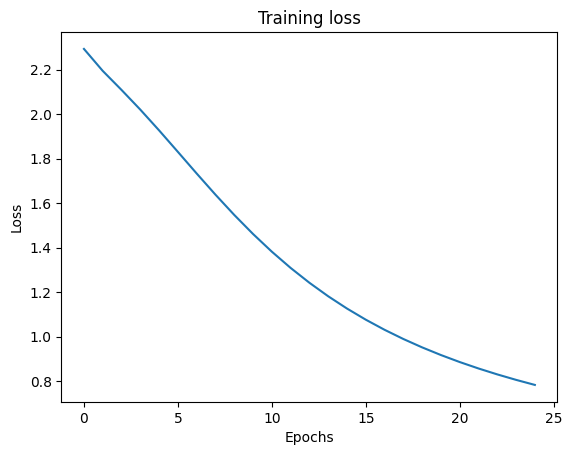

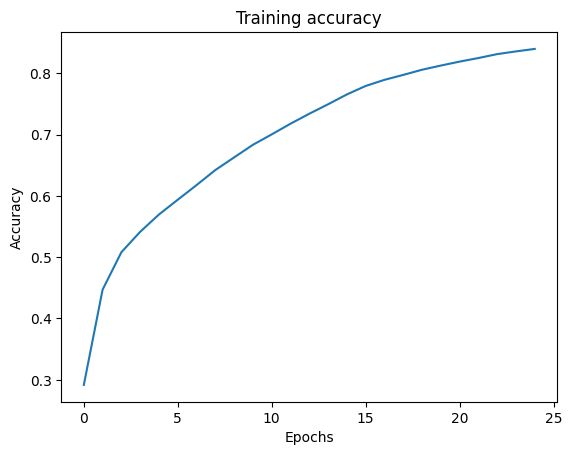

In [109]:
import matplotlib.pyplot as plt

# Plot the training loss and accuracy separately.
plt.plot(range(n_epochs), train_loss_list, label='train loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training loss')
plt.show()

plt.plot(range(n_epochs), train_accuracy_list, label='train accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy')
plt.show()

### Task 3C.3 Visualizing the Predictions and Weights (5pt)

In your solution, **include a plot of the test samples using the following code.**

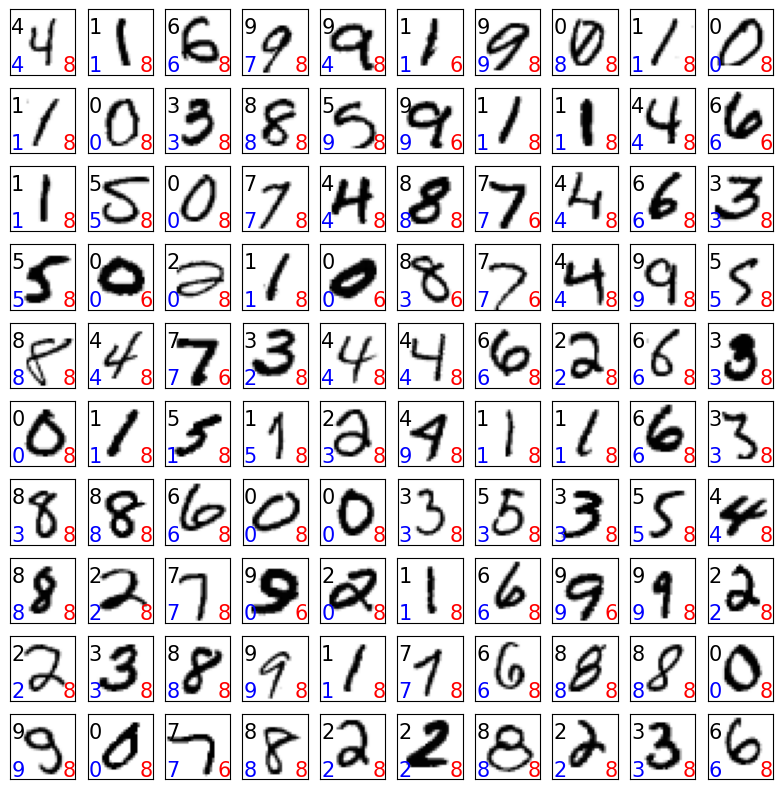

In [110]:
import matplotlib.pyplot as plt

# plot sample test images together with their groundtruth 
# and predicted labels before and after training

fig, axes = plt.subplots(10, 10, figsize=(10, 10))
fig.subplots_adjust(wspace=0)
for a, image, true_label, pred_init, pred_trained in zip(
        axes.flatten(), test_data[selected],
        true_labels, preds_init, preds_trained):
    a.imshow(image.reshape(28, 28), cmap='gray_r')
    a.text(0, 10, str(true_label), color="black", size=15)
    a.text(0, 26, str(pred_trained), color="blue", size=15)
    a.text(22, 26, str(pred_init), color="red", size=15)

    a.set_xticks(())
    a.set_yticks(())

plt.show()

Please include a **visualization of the weights of the first layer in the MLP**, along with a **detailed explanation of the code** and **a brief summary of any observed patterns and understandings**.

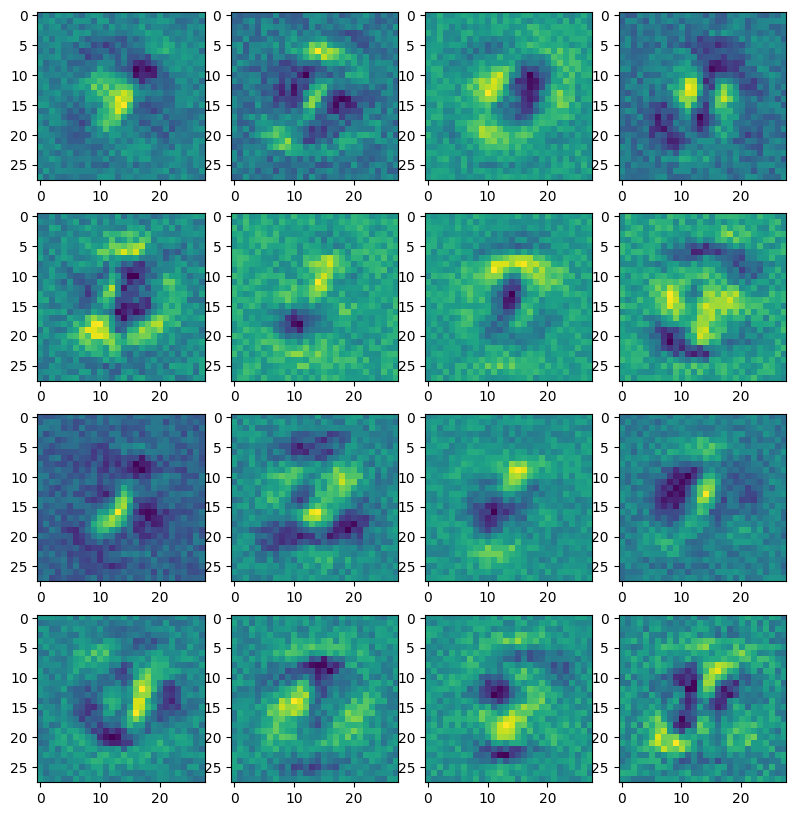

In [111]:
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.subplots_adjust(wspace=0)
idx = 0
for a in axes.flatten():
    a.imshow(model.layers[0].w[:, idx].reshape((28, 28)))
    idx +=1
plt.show()

### Task 3C.4: Hyperparameter tuning

Modify only the network architecture (e.g. number of hidden units, activation functions, etc.) to improve the test accuracy, and provide a summary of your findings.

In [112]:
# Initialize model
print('Initializing neural network')

model = MLP(784, 10, [32, 16], [relu, relu]) ## Your code here ##

################# Do not modify the following code ############
selected = np.random.randint(test_data.shape[0], size=100)
true_labels = np.argmax(test_labels[selected], axis=1)
preds_init = model.predict(test_data[selected])

print('Start training')

n_train = train_data.shape[0]
n_epochs = 25
batch_size = 100
opt = GradientDescentOptimizer(0.01)

for i in range(n_epochs):
    sum_loss = 0.0
    for j in range((n_train - 1) // batch_size + 1):
        batch_data = train_data[j*batch_size:(j+1)*batch_size]
        batch_labels = train_labels[j*batch_size:(j+1)*batch_size]
        _, loss = model.forwardprop(batch_data, batch_labels)
        if np.isnan(loss):
            print('batch %s loss is abnormal')
            print(loss)
            continue
        sum_loss += loss
        model.backprop(batch_labels)
        opt.update(model)
    train_loss = sum_loss/(j+1)
    train_accuracy = (np.sum(model.predict(train_data) == 
                              np.argmax(train_labels, axis=1)) / 
                      np.float64(train_labels.shape[0]))
    
    print('=' * 20 + ('Epoch %d' % i) + '=' * 20)
    print('Train loss %s accuracy %s' % (train_loss, train_accuracy))

# Compute test loss and accuracy.
_, test_loss = model.forwardprop(test_data, test_labels)
test_accuracy = (np.sum(model.predict(test_data) == 
                        np.argmax(test_labels, axis=1)) / 
                  np.float64(test_labels.shape[0]))
print('=' * 20 + 'Training finished' + '=' * 20 + '\n')
print ('Test loss %s accuracy %s\n' %
        (test_loss, test_accuracy))

preds_trained = model.predict(test_data[selected])

Initializing neural network
Start training
====================Epoch 0====================
Train loss 2.185933588631658 accuracy 0.4147142857142857
====================Epoch 1====================
Train loss 1.7075950288920052 accuracy 0.686047619047619
====================Epoch 2====================
Train loss 1.1255080930062609 accuracy 0.7804285714285715
====================Epoch 3====================
Train loss 0.789699609762289 accuracy 0.8196666666666667
====================Epoch 4====================
Train loss 0.6199262798857494 accuracy 0.8445238095238096
====================Epoch 5====================
Train loss 0.5292728414998911 accuracy 0.8628571428571429
====================Epoch 6====================
Train loss 0.4740300690264359 accuracy 0.8740476190476191
====================Epoch 7====================
Train loss 0.4366746923705657 accuracy 0.8822380952380953
====================Epoch 8====================
Train loss 0.4097643980458681 accuracy 0.8879523809523809
======

## (Bonus) Task 3C.5: Adding Momentum Optimization (10 pt)

### Overview
Gradient descent with momentum helps accelerate training by smoothing the update steps. Instead of updating weights solely based on the current gradient, momentum considers past updates to maintain velocity in the optimization path.

### Why Using Momentum?
- Helps navigate **flat regions** and **smoother convergence**.
- Reduces **oscillations** in high-curvature areas.
- Allows for **faster convergence** than standard gradient descent.

### Momentum Update Rule
For each weight $\mathbf{w}$ and bias $b$, we maintain a **velocity term** $\mathbf{v}$ to update parameters as follows:

1. Compute the velocity update:
   $$
   \mathbf{v} = \beta \mathbf{v} - \eta \nabla \mathbf{w}
   $$
   where:
   - $\mathbf{v}$ is the velocity (momentum term),
   - $\beta$ is the momentum coefficient (e.g., 0.9),
   - $\eta$ is the learning rate,
   - $\nabla \mathbf{w}$ is the current gradient.

2. Update the parameters using the velocity:
   $$
   \mathbf{w} = \mathbf{w} + \mathbf{v}
   $$

### Implementation Steps
1. Modify the optimizer to **store velocity** for each parameter.
2. Update parameters using both **past velocity** and **current gradients**.
3. Compare training loss and accuracy **with and without momentum**.

In the next code cell, you will implement the `MomentumOptimizer` class following the above steps.


In [113]:
import numpy as np

class MomentumOptimizer:
    def __init__(
        self, 
        learning_rate: float, 
        momentum: float = 0.9, 
        decay_steps: int = 1000, 
        decay_rate: float = 1.0
    ):
        """
        Stochastic Gradient Descent with Momentum.

        Args:
            learning_rate (float): Initial learning rate.
            momentum (float): Momentum factor (default: 0.9).
            decay_steps (int): Number of steps after which learning rate decays (default: 1000).
            decay_rate (float): Multiplicative factor for learning rate decay (default: 1.0).
        """
        self.learning_rate: float = learning_rate
        self.momentum: float = momentum
        self.steps: int = 0
        self.decay_steps: int = decay_steps
        self.decay_rate: float = decay_rate
        
        # Initialize velocity dictionaries for weights and biases
        self.velocity_w: dict[int, np.ndarray] = {}  
        self.velocity_b: dict[int, np.ndarray] = {}  

    def update(self, model) -> None:
        """
        Update model parameters using momentum-based gradient descent.

        Args:
            model: The MLP model with layers containing weights (w), biases (b), 
                   and their corresponding gradients (d_w, d_b).
        """
        for i, layer in enumerate(model.layers):
            if i not in self.velocity_w:
                # Initialize velocity terms for this layer
                self.velocity_w[i] = np.zeros_like(layer.w)
                self.velocity_b[i] = np.zeros_like(layer.b)
            
            # Compute velocity updates
            self.velocity_w[i] = (self.momentum*self.velocity_w[i]) - (self.learning_rate*layer.d_w)
            self.velocity_b[i] = (self.momentum*self.velocity_b[i]) - (self.learning_rate*layer.d_b)
            
            # Apply updates to parameters
            layer.w = layer.w + self.velocity_w[i]
            layer.b = layer.b + self.velocity_b[i]
        
        # Apply learning rate decay
        self.steps += 1
        if self.steps % self.decay_steps == 0:
            self.learning_rate = self.learning_rate * self.decay_rate

In the next code cell, you will initialize a new model.

In [114]:
# Initialize model
print('Initializing neural network')
model = MLP(784, 10, [16], [sigmoid])

selected = np.random.randint(test_data.shape[0], size=100)
true_labels = np.argmax(test_labels[selected], axis=1)
preds_init = model.predict(test_data[selected])

Initializing neural network


In the next code cell, you will use the function `train_model(optimizer)` to run training with your optimizers.

In [115]:
# Function to train model and return loss & accuracy
def train_model(optimizer, n_epochs=25, batch_size=100):
    model = MLP(784, 10, [16], [sigmoid])
    opt = optimizer  # Use either GD or Momentum
    optimizer_name = opt.__class__.__name__ 
    
    train_loss_list = []
    train_accuracy_list = []

    for i in range(n_epochs):
        sum_loss = 0.0
        for j in range((n_train - 1) // batch_size + 1):
            batch_data = train_data[j * batch_size:(j + 1) * batch_size]
            batch_labels = train_labels[j * batch_size:(j + 1) * batch_size]
            
            _, loss = model.forwardprop(batch_data, batch_labels)
            if np.isnan(loss):
                continue
            
            sum_loss += loss
            model.backprop(batch_labels)
            opt.update(model)

        train_loss = sum_loss / (j + 1)
        train_accuracy = (np.sum(model.predict(train_data) == np.argmax(train_labels, axis=1)) / 
                          np.float64(train_labels.shape[0]))
        
        train_loss_list.append(train_loss)
        train_accuracy_list.append(train_accuracy)
        print('=' * 20 + ('Epoch %d' % i) + '=' * 20)
        print('Train loss %s accuracy %s' % (train_loss, train_accuracy))
    
    _, test_loss = model.forwardprop(test_data, test_labels)
    test_accuracy = (np.sum(model.predict(test_data) == np.argmax(test_labels, axis=1)) / 
                      np.float64(test_labels.shape[0]))
    print('=' * 20 + 'Training finished' + '=' * 20 + '\n')
    print ('Test loss %s accuracy %s\n' %
            (test_loss, test_accuracy))

    return train_loss_list, train_accuracy_list, test_loss, test_accuracy, optimizer_name

In [116]:
# Train with both optimizers
print("Gradient Descent")
loss_gd, acc_gd, test_loss_gd, test_acc_gd, name_gd = train_model(GradientDescentOptimizer(0.01))

print("Gradient Descent with Momentum")
loss_mo, acc_mo, test_loss_mo, test_acc_mo, name_mo = train_model(MomentumOptimizer(0.01, 0.95))

Gradient Descent
====================Epoch 0====================
Train loss 2.2856806900015325 accuracy 0.12480952380952381
====================Epoch 1====================
Train loss 2.189762214999776 accuracy 0.44366666666666665
====================Epoch 2====================
Train loss 2.1125862701140368 accuracy 0.5066666666666667
====================Epoch 3====================
Train loss 2.0309497895933344 accuracy 0.5281904761904762
====================Epoch 4====================
Train loss 1.9440812238187903 accuracy 0.5578095238095238
====================Epoch 5====================
Train loss 1.854001871828758 accuracy 0.5853809523809523
====================Epoch 6====================
Train loss 1.7635426232430722 accuracy 0.6125714285714285
====================Epoch 7====================
Train loss 1.6752450181319951 accuracy 0.64
====================Epoch 8====================
Train loss 1.5908169022048784 accuracy 0.6657619047619048
====================Epoch 9================

In the next cell, you will plot training loss over epochs for both optimizers.

/var/folders/nx/x07g8mvd6zddy00xc972vvnh0000gn/T/ipykernel_87315/4145076164.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


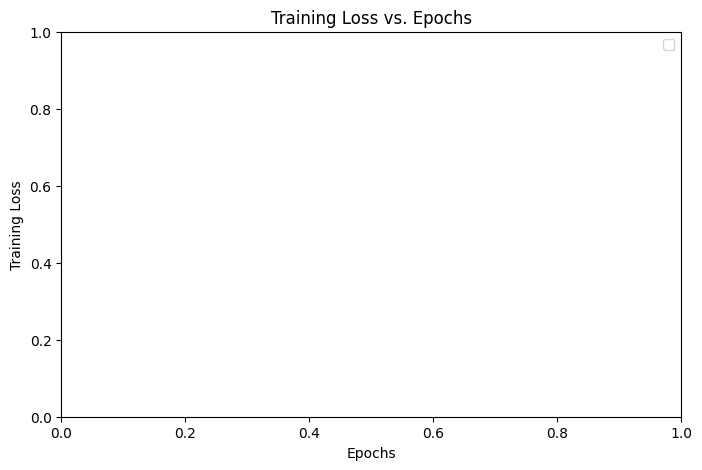

Test Accuracy (GradientDescentOptimizer): 0.8402
Test Accuracy (MomentumOptimizer): 0.9277


In [117]:
# Plot training loss over epochs
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

### YOUR CODE HERE ###
# --- PLOT FOR GD
# --- PLOT FOR GD WITH MOMENTUM

plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Training Loss vs. Epochs')
plt.legend()
plt.show()

# Print final test accuracy
print(f"Test Accuracy ({name_gd}): {test_acc_gd:.4f}")
print(f"Test Accuracy ({name_mo}): {test_acc_mo:.4f}")

Tune the parameters, then **answer the following questions**:
1. Which optimizer converges faster? Justify your answer based on the training loss curves.
2. Does momentum improve test accuracy? Why or why not?
3. In what situations would momentum be more beneficial?

In [118]:
# You answer below

## (Bonus) Task 3C.6: Compare MLP to CNN (10pt)
1. Complete an implmentation of convolutional neural network below.

In [119]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Assume these variables are already defined:
#   train_data: NumPy array of shape (N_train, 784) with values in [0, 1]
#   test_data:  NumPy array of shape (N_test, 784) with values in [0, 1]
#   train_labels: one-hot encoded labels (shape: (N_train, 10))
#   test_labels:  one-hot encoded labels (shape: (N_test, 10))

# Convert one-hot encoded labels to integer labels
train_labels_int = np.argmax(train_labels, axis=1)
test_labels_int  = np.argmax(test_labels, axis=1)

# Reshape the data from (N, 784) to (N, 1, 28, 28)
train_data_tensor = torch.from_numpy(train_data.reshape(-1, 1, 28, 28)).float()
test_data_tensor  = torch.from_numpy(test_data.reshape(-1, 1, 28, 28)).float()

# Convert labels to PyTorch tensors
train_labels_tensor = torch.from_numpy(train_labels_int).long()
test_labels_tensor  = torch.from_numpy(test_labels_int).long()

# Create DataLoaders for training and testing
batch_size = 64
train_dataset = TensorDataset(train_data_tensor, train_labels_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(test_data_tensor, test_labels_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


# Define a simple CNN model for MNIST.
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        # First convolutional block: Conv -> ReLU -> MaxPool
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)  # TODO: Adjust parameters if needed
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Second convolutional block: Conv -> ReLU -> MaxPool
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)  # TODO: Adjust parameters if needed
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Fully connected layers
        # After two pooling layers, the 28x28 image becomes 7x7 feature maps.
        self.fc1 = nn.Linear(64 * 7 * 7, 128)  # TODO: Ensure dimensions match
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)  # 10 classes for MNIST

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = x.view(x.size(0), -1)  # TODO: Flatten the tensor
        x = self.fc2(self.relu3(self.fc1(x)))
        return x


# Instantiate the CNN, define loss and optimizer.

# TODO: Instantiate the CNN model
cnn_model = CNNModel()

# TODO: Define the loss function
lossfunc = nn.CrossEntropyLoss()

# TODO: Set up the optimizer
optimizer = torch.optim.Adam(cnn_model.parameters(), lr=0.001)


# Training Loop
num_epochs = 5
cnn_model.train()  # Set the model to training mode
print("Training CNN model...")

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()         # Clear the gradients
        outputs = cnn_model(images)     # Forward pass
        loss = lossfunc(outputs, labels)
        loss.backward()               # Backward pass
        optimizer.step()              # Update parameters
        
        running_loss += loss.item()
        if (i + 1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {running_loss/100:.4f}")
            running_loss = 0.0

print("CNN training finished!")
cnn_model.eval()  # Set the model to evaluation mode


# Evaluate the CNN on the test set.
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = cnn_model(images)
        predicted = torch.max(outputs, 1)[1].data.squeeze()
# TODO: Extract predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# print test accuracy
accuracy = correct * 100.0 / total
print(accuracy)

Training CNN model...
Epoch [1/5], Step [100/329], Loss: 0.7754
Epoch [1/5], Step [200/329], Loss: 0.2104
Epoch [1/5], Step [300/329], Loss: 0.1367
Epoch [2/5], Step [100/329], Loss: 0.1043
Epoch [2/5], Step [200/329], Loss: 0.0828
Epoch [2/5], Step [300/329], Loss: 0.0870
Epoch [3/5], Step [100/329], Loss: 0.0573
Epoch [3/5], Step [200/329], Loss: 0.0577
Epoch [3/5], Step [300/329], Loss: 0.0590
Epoch [4/5], Step [100/329], Loss: 0.0437
Epoch [4/5], Step [200/329], Loss: 0.0402
Epoch [4/5], Step [300/329], Loss: 0.0475
Epoch [5/5], Step [100/329], Loss: 0.0290
Epoch [5/5], Step [200/329], Loss: 0.0329
Epoch [5/5], Step [300/329], Loss: 0.0394
CNN training finished!
98.22857142857143


Below is the code for you to draw your own number and predict the outcome.

**Question**: Brifely talk about which method for the task of handwritten text reconigtion is better and why do you think that is.



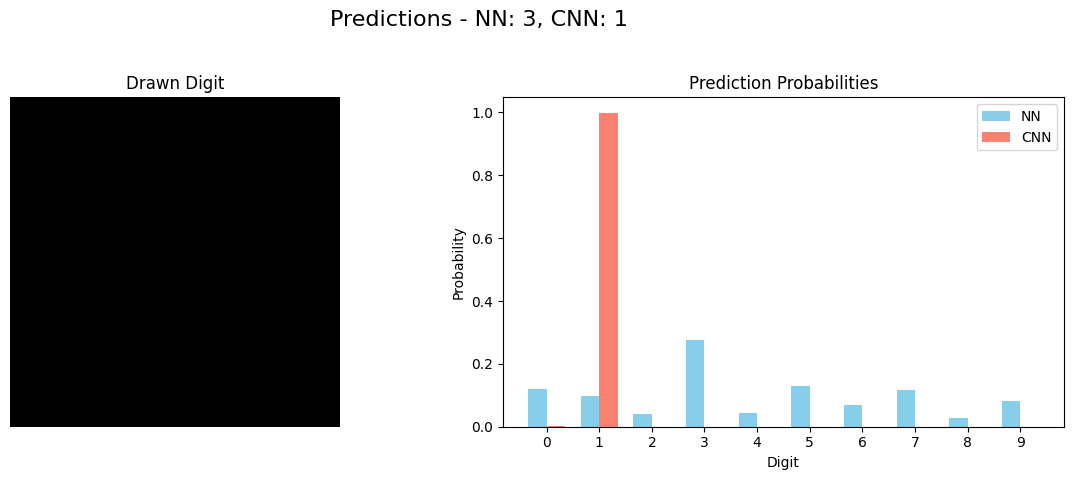

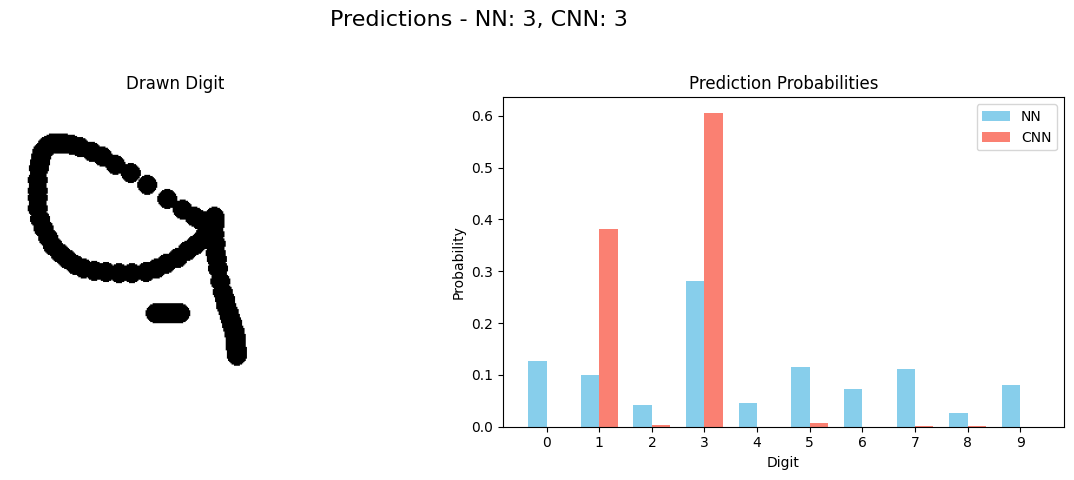

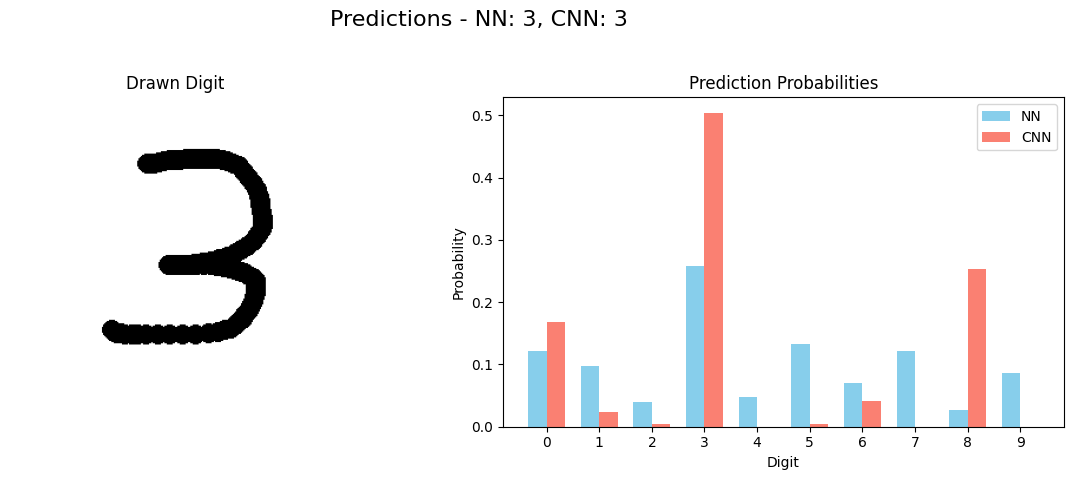

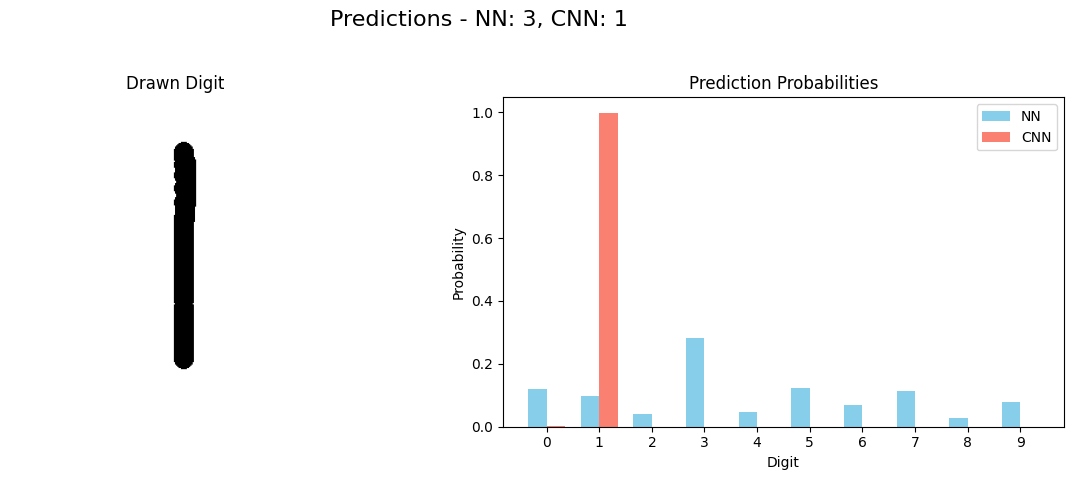

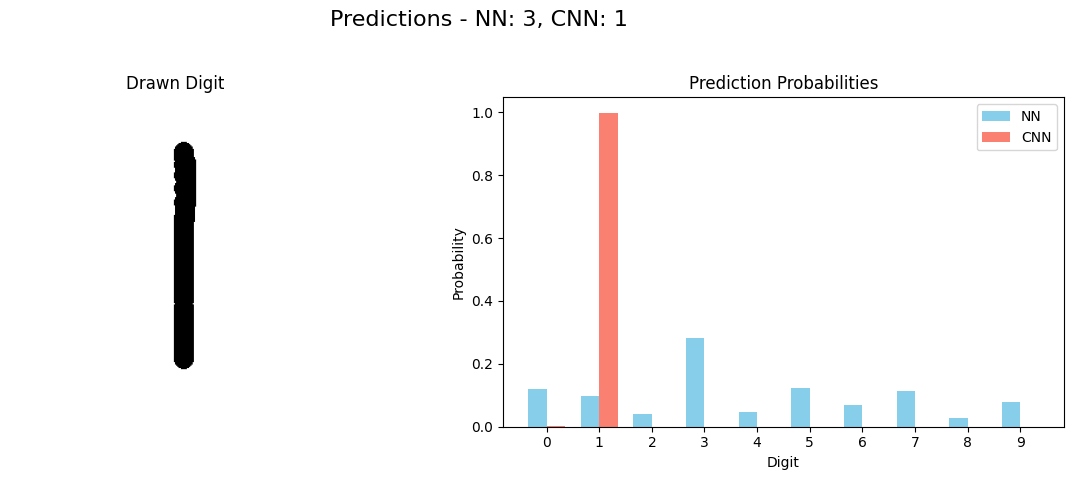

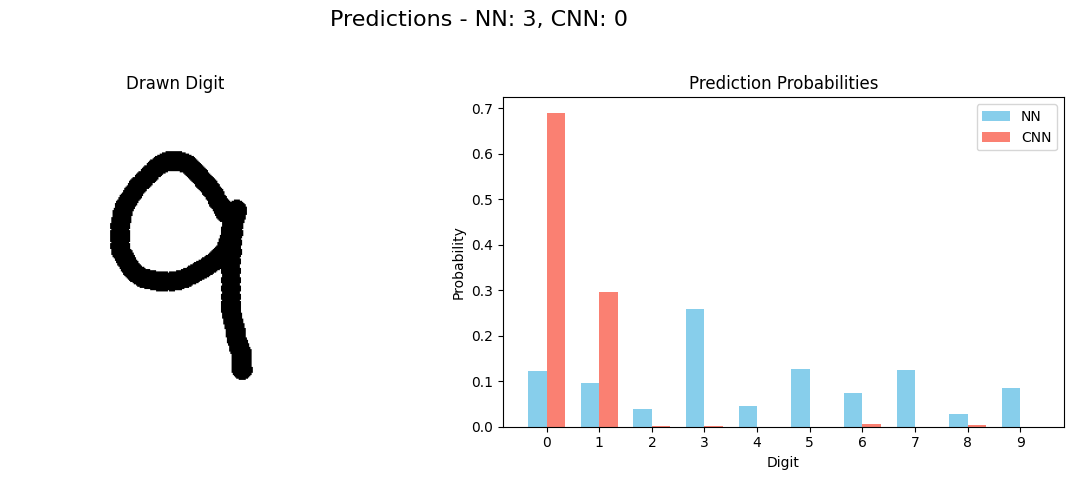

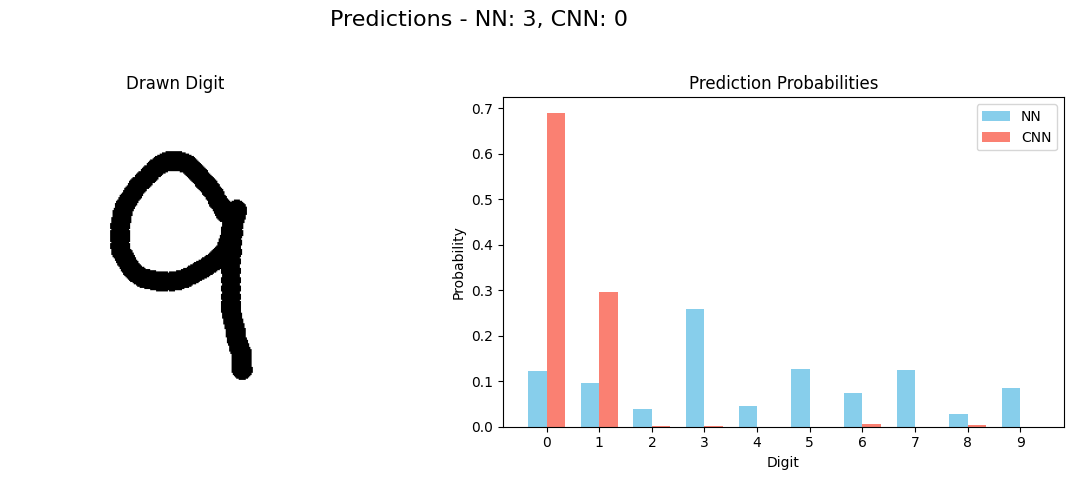

KeyboardInterrupt: 

In [120]:
import tkinter as tk
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import torch
%gui tk

class DigitDrawer:
    def __init__(self, master, nn_model, cnn_model):
        self.master = master
        self.master.title("Digit Recognition")

        self.canvas_width = 280
        self.canvas_height = 280
        self.canvas = tk.Canvas(master, width=self.canvas_width, height=self.canvas_height, bg="white")
        self.canvas.pack(padx=10, pady=10)

        # Frame for buttons
        button_frame = tk.Frame(master)
        button_frame.pack(pady=5)
        
        self.button_predict = tk.Button(button_frame, text="Predict", command=self.predict)
        self.button_predict.pack(side=tk.LEFT, padx=5)

        self.button_clear = tk.Button(button_frame, text="Clear", command=self.clear)
        self.button_clear.pack(side=tk.LEFT, padx=5)

        # Create a high-res image for smoother drawing.
        # We later downsample to 28x28 for the model.
        self.image = Image.new("L", (self.canvas_width, self.canvas_height), 255)
        self.draw = ImageDraw.Draw(self.image)

        self.canvas.bind("<B1-Motion>", self.paint)

        self.nn_model = nn_model
        self.cnn_model = cnn_model
        
    def softmax(x):
        # x is assumed to be a NumPy array
        shifted_x = x - np.max(x, axis=1, keepdims=True)  
        exp_x = np.exp(shifted_x)
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)


    def paint(self, event):
        """Draw on both the canvas and the high-res PIL image."""
        # Define the brush radius
        radius = 8  
        x, y = event.x, event.y
        x1, y1 = x - radius, y - radius
        x2, y2 = x + radius, y + radius

        # Draw on the Tkinter canvas (for display)
        self.canvas.create_oval(x1, y1, x2, y2, fill="black", outline="black")
        # Draw on the high resolution PIL image (for prediction)
        self.draw.ellipse([x1, y1, x2, y2], fill="black")

    def preprocess_image(self):
        """
        Downsample the high-res image (280x280) to 28x28 using a high-quality
        resampling filter (LANCZOS) to preserve the drawing's smoothness.
        Then normalize the pixel values to [0,1].
        """
        img_resized = self.image.resize((28, 28), resample=Image.LANCZOS)
        # Convert image to numpy array and normalize (white background=1, black=0)
        img_array = np.array(img_resized).reshape(1, 1, 28, 28) / 255.0
        return img_array

    def predict(self):
        """Predict the digit using both the NN and CNN models and display the results."""
        img_array = self.preprocess_image()

        # --- NN Prediction ---
        # Use the NN's forward propagation method to get full probabilities.
        nn_probs, _ = self.nn_model.forwardprop(img_array.reshape(1, -1))
        nn_probs = nn_probs[0]  # probabilities for the single sample
        nn_prediction = np.argmax(nn_probs)

        # --- CNN Prediction ---
        self.cnn_model.eval()
        with torch.no_grad():
            img_tensor = torch.tensor(img_array, dtype=torch.float32)
            cnn_output = self.cnn_model(img_tensor)
            cnn_probs = torch.nn.functional.softmax(cnn_output, dim=1).numpy()[0]
            cnn_prediction = np.argmax(cnn_probs)

        # Create a figure to display the drawn image and the prediction probabilities
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Left subplot: the high-res drawn digit (before downsampling)
        axes[0].imshow(self.image, cmap='gray')
        axes[0].set_title("Drawn Digit")
        axes[0].axis('off')

        # Right subplot: a bar chart comparing prediction probabilities
        digits = np.arange(10)
        bar_width = 0.35
        axes[1].bar(digits - bar_width/2, nn_probs, bar_width, label='NN', color='skyblue')
        axes[1].bar(digits + bar_width/2, cnn_probs, bar_width, label='CNN', color='salmon')
        axes[1].set_xticks(digits)
        axes[1].set_xlabel("Digit")
        axes[1].set_ylabel("Probability")
        axes[1].set_title("Prediction Probabilities")
        axes[1].legend()

        plt.suptitle(f"Predictions - NN: {nn_prediction}, CNN: {cnn_prediction}", fontsize=16)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

    def clear(self):
        """Clear the canvas and reset the high-res image."""
        self.canvas.delete("all")
        self.image = Image.new("L", (self.canvas_width, self.canvas_height), 255)
        self.draw = ImageDraw.Draw(self.image)

# --------------------------
# Launch the Graphical User Interface
# --------------------------
# Ensure that 'model' (the NN) and 'cnn_model' (the CNN) are loaded before this code runs.
root = tk.Tk()
app = DigitDrawer(root, model, cnn_model)
root.mainloop()

